1. Tokenized

In [1]:
import nltk
from nltk import word_tokenize
import string



text = "Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and \
nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all \types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types of systems and systems of mixed types."


def clean(text):
    text = text.lower()
    cleaned_text = ''
    printable = set(string.printable)
    for symbol in text:
        if symbol in printable:
            cleaned_text = cleaned_text + symbol
    return cleaned_text

cleaned_text = clean(text)
text = word_tokenize(cleaned_text)

print(text)

['compatibility', 'of', 'systems', 'of', 'linear', 'constraints', 'over', 'the', 'set', 'of', 'natural', 'numbers', '.', 'criteria', 'of', 'compatibility', 'of', 'a', 'system', 'of', 'linear', 'diophantine', 'equations', ',', 'strict', 'inequations', ',', 'and', 'nonstrict', 'inequations', 'are', 'considered', '.', 'upper', 'bounds', 'for', 'components', 'of', 'a', 'minimal', 'set', 'of', 'solutions', 'and', 'algorithms', 'of', 'construction', 'of', 'minimal', 'generating', 'sets', 'of', 'solutions', 'for', 'all', 'ypes', 'of', 'systems', 'are', 'given', '.', 'these', 'criteria', 'and', 'the', 'corresponding', 'algorithms', 'for', 'constructing', 'a', 'minimal', 'supporting', 'set', 'of', 'solutions', 'can', 'be', 'used', 'in', 'solving', 'all', 'the', 'considered', 'types', 'of', 'systems', 'and', 'systems', 'of', 'mixed', 'types', '.']


2. annotated with POS tags

In [2]:
POS_tag = nltk.pos_tag(text)
print(POS_tag)

[('compatibility', 'NN'), ('of', 'IN'), ('systems', 'NNS'), ('of', 'IN'), ('linear', 'JJ'), ('constraints', 'NNS'), ('over', 'IN'), ('the', 'DT'), ('set', 'NN'), ('of', 'IN'), ('natural', 'JJ'), ('numbers', 'NNS'), ('.', '.'), ('criteria', 'NNS'), ('of', 'IN'), ('compatibility', 'NN'), ('of', 'IN'), ('a', 'DT'), ('system', 'NN'), ('of', 'IN'), ('linear', 'JJ'), ('diophantine', 'NN'), ('equations', 'NNS'), (',', ','), ('strict', 'JJ'), ('inequations', 'NNS'), (',', ','), ('and', 'CC'), ('nonstrict', 'JJ'), ('inequations', 'NNS'), ('are', 'VBP'), ('considered', 'VBN'), ('.', '.'), ('upper', 'JJ'), ('bounds', 'NNS'), ('for', 'IN'), ('components', 'NNS'), ('of', 'IN'), ('a', 'DT'), ('minimal', 'JJ'), ('set', 'NN'), ('of', 'IN'), ('solutions', 'NNS'), ('and', 'CC'), ('algorithms', 'NN'), ('of', 'IN'), ('construction', 'NN'), ('of', 'IN'), ('minimal', 'JJ'), ('generating', 'VBG'), ('sets', 'NNS'), ('of', 'IN'), ('solutions', 'NNS'), ('for', 'IN'), ('all', 'DT'), ('ypes', 'NNS'), ('of', 'IN')

3. lemmatization

In [3]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
adj_tags = ['JJ', 'JJR', 'JJS']
lemmatized_text = []
for pair in POS_tag:
    if pair[1] in adj_tags:
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(pair[0], pos='a'))) # a denotes adj
    else:
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(pair[0]))) # default tag is noun
print(lemmatized_text)
POS_tag = nltk.pos_tag(lemmatized_text)

['compatibility', 'of', 'system', 'of', 'linear', 'constraint', 'over', 'the', 'set', 'of', 'natural', 'number', '.', 'criterion', 'of', 'compatibility', 'of', 'a', 'system', 'of', 'linear', 'diophantine', 'equation', ',', 'strict', 'inequations', ',', 'and', 'nonstrict', 'inequations', 'are', 'considered', '.', 'upper', 'bound', 'for', 'component', 'of', 'a', 'minimal', 'set', 'of', 'solution', 'and', 'algorithm', 'of', 'construction', 'of', 'minimal', 'generating', 'set', 'of', 'solution', 'for', 'all', 'ypes', 'of', 'system', 'are', 'given', '.', 'these', 'criterion', 'and', 'the', 'corresponding', 'algorithm', 'for', 'constructing', 'a', 'minimal', 'supporting', 'set', 'of', 'solution', 'can', 'be', 'used', 'in', 'solving', 'all', 'the', 'considered', 'type', 'of', 'system', 'and', 'system', 'of', 'mixed', 'type', '.']


4. syntactic filter: noun and adj

In [4]:
stopwords = []
noun_adj_tags = ['NN','NNS','NNP','NNPS','JJ','JJR','JJS','VBG','FW'] 
for pair in POS_tag:
    if pair[1] not in noun_adj_tags:
        stopwords.append(pair[0])
punctuations = list(str(string.punctuation))
stopwords = stopwords + punctuations
print(stopwords)
        

['of', 'of', 'over', 'the', 'of', '.', 'of', 'of', 'a', 'of', ',', ',', 'and', 'are', 'considered', '.', 'for', 'of', 'a', 'of', 'and', 'of', 'of', 'of', 'for', 'all', 'of', 'are', 'given', '.', 'these', 'and', 'the', 'for', 'a', 'of', 'can', 'be', 'used', 'in', 'all', 'the', 'considered', 'of', 'and', 'of', '.', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [5]:
stopword_file = open("long_stopwords.txt", "r")

long_stopwords = []

for line in stopword_file.readlines():
    long_stopwords.append(str(line.strip()))

stopwords_plus = []
stopwords_plus = stopwords + long_stopwords
stopwords_plus = set(stopwords_plus)
print(stopwords_plus)

{'indeed', 'anyways', 'ts', 'certain', 'were', 'our', 'x', 'used', 'past', 'name', 'showns', 'sub', 'after', 'getting', 'sent', 'myself', 'around', 'nor', 'relatively', 'wheres', 'howbeit', 'tip', 'ref', 'present', 'happens', 'whence', 'mostly', 'que', 'right', 'necessarily', 'look', 'thus', 'it', 'regards', 'vols', 'upon', 'sometime', 'non', '&', 'often', 'formerly', 'from', 'make', 'thanx', 'thou', 'down', 'meantime', 'enough', 'unto', 'causes', 'wasnt', 'nd', 'com', 'gives', 'ought', 'let', 'we', 'resulted', 'both', 'during', 'm', 'unless', 'werent', 'a', 'obviously', 'accordance', 'certainly', 'part', 'specify', 'otherwise', 'in', 'affects', 'noted', 'whereas', 'more', 'mg', 'awfully', 'beside', 'am', 'www', 'youre', 'something', 'until', 'several', 'specifying', 'f', 'trying', "didn't", 'take', 'obtained', 'similarly', 'unlikely', 'although', 'everything', 'once', 'plus', 'pp', 'themselves', 'get', 'saying', 'wont', 'elsewhere', 'seemed', 'us', '%', 'whereupon', 'sec', 'able', 're

5. remove stopwords

In [6]:
processed_text = []
for word in lemmatized_text:
    if word not in stopwords_plus:
        processed_text.append(word)
print(processed_text)

['compatibility', 'system', 'linear', 'constraint', 'set', 'natural', 'number', 'criterion', 'compatibility', 'system', 'linear', 'diophantine', 'equation', 'strict', 'inequations', 'nonstrict', 'inequations', 'upper', 'bound', 'component', 'minimal', 'set', 'solution', 'algorithm', 'construction', 'minimal', 'generating', 'set', 'solution', 'ypes', 'system', 'criterion', 'algorithm', 'constructing', 'minimal', 'supporting', 'set', 'solution', 'solving', 'type', 'system', 'system', 'mixed', 'type']


6. Unique Vocabulary

In [7]:
vocabulary = list(set(processed_text))
print(vocabulary)

['component', 'system', 'upper', 'constraint', 'bound', 'criterion', 'inequations', 'solution', 'set', 'solving', 'nonstrict', 'supporting', 'diophantine', 'type', 'algorithm', 'generating', 'construction', 'constructing', 'minimal', 'number', 'natural', 'compatibility', 'mixed', 'ypes', 'equation', 'strict', 'linear']


7. build graph(undirected unweighted)

In [8]:
import numpy as np
vocab_len = len(vocabulary)

window_size =  2 # window can be set from 2 to 10
coocurrences = []
# create a adjacent matrix
adjacent_matrix = np.zeros((vocab_len, vocab_len))
# initialize vertex score
score = np.zeros((vocab_len))
for i in range(0, vocab_len):
    score[i] = 1
    for j in range(0, vocab_len):
        if i==j:
            adjacent_matrix[i][j] = 0
        else:
            for window_start in range(0, (len(processed_text) - window_size + 1)):
                window_end = window_start + window_size
                window  = processed_text[window_start : window_end]
                if (vocabulary[i] in window) and (vocabulary[j] in window):
                    index_i = window_start + window.index(vocabulary[i])
                    index_j = window_start + window.index(vocabulary[j])
                    if [index_i, index_j] not in coocurrences:
                        adjacent_matrix[i][j] = 1
                        coocurrences.append([index_i, index_j])
print(score)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]


In [9]:
inout = np.zeros((vocab_len))

for i in range(0, vocab_len):
    for j in range(0, vocab_len):
        inout[i]+=adjacent_matrix[i][j]
inout

array([2., 6., 2., 2., 2., 4., 3., 4., 6., 2., 1., 2., 2., 3., 4., 2., 2.,
       2., 6., 2., 2., 2., 2., 2., 2., 2., 3.])

8. Socring vertices

In [10]:
ITERATIONS = 25 #usually for 20-30
THRESHOLD = 0.0001
d = 0.85 # damping factor
for iter in range(0, ITERATIONS):
    prev_score = np.copy(score)
    for i in range(0, vocab_len):
        summation = 0
        for j in range(0, vocab_len):
            if adjacent_matrix[i][j] != 0:
                summation += (1/inout[j]) * score[j]
        score[i] = (1-d) + d*summation
    if np.sum(np.fabs(prev_score - score)) <= THRESHOLD:
        print('converging at iteration ', str(iter))
        break


In [11]:
for i in range(0, vocab_len):
    print(vocabulary[i], str(score[i]))

component 0.8031936220139722
system 1.936251011123248
upper 0.9237849657600081
constraint 0.733098111387612
bound 0.8839658998039416
criterion 1.3175316511110928
inequations 1.405038632748238
solution 1.3050078165870294
set 1.9257619961886245
solving 0.7207552895953844
nonstrict 0.5480942792786674
supporting 0.7003219500375704
diophantine 0.8452353137523048
type 1.0356654377591505
algorithm 1.306696072003438
generating 0.7003219500375704
construction 0.7051785825449124
constructing 0.7051785825449124
minimal 1.9588490248444366
number 0.7440726756302841
natural 0.7390471699362593
compatibility 0.7042777024369007
mixed 0.7177407672742194
ypes 0.7016163876005372
equation 0.9057725713032789
strict 0.933047622082561
linear 1.0950939322602582


9. Phrase Partioning

In [12]:
phrases = []
phrase = ' '
for word in lemmatized_text:
    if word in stopwords_plus:
        if phrase!=' ':
            phrases.append(str(phrase).strip().split())
        phrase = ' '
    elif word not in stopwords_plus:
        phrase = phrase + str(word)
        phrase = phrase + ' '
print(phrases)

[['compatibility'], ['system'], ['linear', 'constraint'], ['set'], ['natural', 'number'], ['criterion'], ['compatibility'], ['system'], ['linear', 'diophantine', 'equation'], ['strict', 'inequations'], ['nonstrict', 'inequations'], ['upper', 'bound'], ['component'], ['minimal', 'set'], ['solution'], ['algorithm'], ['construction'], ['minimal', 'generating', 'set'], ['solution'], ['ypes'], ['system'], ['criterion'], ['algorithm'], ['constructing'], ['minimal', 'supporting', 'set'], ['solution'], ['solving'], ['type'], ['system'], ['system'], ['mixed', 'type']]


In [13]:
unique_phrases = []

for phrase in phrases:
    if phrase not in unique_phrases:
        unique_phrases.append(phrase)
print(unique_phrases)

for word in vocabulary:
    for phrase in unique_phrases:
        if (word in phrase) and ([word] in unique_phrases) and (len(phrase)>1):
            unique_phrases.remove([word])
            
print(unique_phrases)

[['compatibility'], ['system'], ['linear', 'constraint'], ['set'], ['natural', 'number'], ['criterion'], ['linear', 'diophantine', 'equation'], ['strict', 'inequations'], ['nonstrict', 'inequations'], ['upper', 'bound'], ['component'], ['minimal', 'set'], ['solution'], ['algorithm'], ['construction'], ['minimal', 'generating', 'set'], ['ypes'], ['constructing'], ['minimal', 'supporting', 'set'], ['solving'], ['type'], ['mixed', 'type']]
[['compatibility'], ['system'], ['linear', 'constraint'], ['natural', 'number'], ['criterion'], ['linear', 'diophantine', 'equation'], ['strict', 'inequations'], ['nonstrict', 'inequations'], ['upper', 'bound'], ['component'], ['minimal', 'set'], ['solution'], ['algorithm'], ['construction'], ['minimal', 'generating', 'set'], ['ypes'], ['constructing'], ['minimal', 'supporting', 'set'], ['solving'], ['mixed', 'type']]


10. Scoring phrases(adding corresponding vocabulary scores)

In [14]:
phrase_scores = []
keywords = []
for phrase in unique_phrases:
    phrase_score=0
    keyword = ''
    for word in phrase:
        keyword += str(word)
        keyword += " "
        phrase_score+=score[vocabulary.index(word)]
    phrase_scores.append(phrase_score)
    keywords.append(keyword.strip())

i=0
for keyword in keywords:
    print ("Keyword: '",str(keyword),"', Score: ",str(phrase_scores[i]))
    i+=1

Keyword: ' compatibility ', Score:  0.7042777024369007
Keyword: ' system ', Score:  1.936251011123248
Keyword: ' linear constraint ', Score:  1.8281920436478702
Keyword: ' natural number ', Score:  1.4831198455665433
Keyword: ' criterion ', Score:  1.3175316511110928
Keyword: ' linear diophantine equation ', Score:  2.8461018173158417
Keyword: ' strict inequations ', Score:  2.338086254830799
Keyword: ' nonstrict inequations ', Score:  1.9531329120269054
Keyword: ' upper bound ', Score:  1.8077508655639498
Keyword: ' component ', Score:  0.8031936220139722
Keyword: ' minimal set ', Score:  3.884611021033061
Keyword: ' solution ', Score:  1.3050078165870294
Keyword: ' algorithm ', Score:  1.306696072003438
Keyword: ' construction ', Score:  0.7051785825449124
Keyword: ' minimal generating set ', Score:  4.584932971070631
Keyword: ' ypes ', Score:  0.7016163876005372
Keyword: ' constructing ', Score:  0.7051785825449124
Keyword: ' minimal supporting set ', Score:  4.584932971070631
Keywo

11. Sort keyphrases

In [15]:
sorted_index = np.flip(np.argsort(phrase_scores), 0)
keywords_num = int(len(keywords) / 3)
for i in range(0, keywords_num):
    print(str(keywords[sorted_index[i]]), ' ')

minimal supporting set  
minimal generating set  
minimal set  
linear diophantine equation  
strict inequations  
nonstrict inequations  


12. Visualization: WordCloud

In [16]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [17]:
keywords_dict = {}
for i in range(len(keywords)):
    keywords_dict[keywords[i]] = phrase_scores[i] * 100

In [25]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=1000,
                relative_scaling=1,
                min_font_size = 10).generate_from_frequencies(keywords_dict)

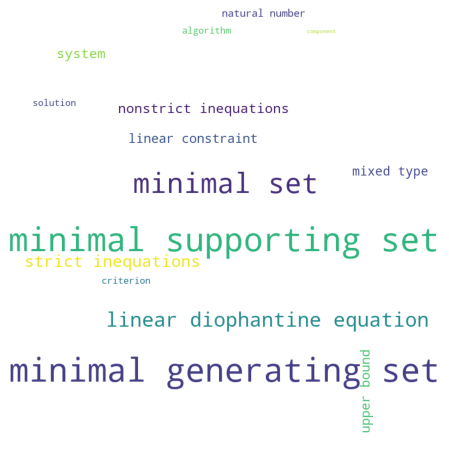

In [26]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 

plt.show()